In [1]:
import sys
import os

# Append the parent directory (src) to sys.path
notebooks_dir = os.path.dirname(os.path.abspath("__file__"))
src_dir = os.path.abspath(os.path.join(notebooks_dir, ".."))
if src_dir not in sys.path:
    sys.path.insert(0, src_dir)

In [2]:
from scripts.correlation_analysis import (
    load_news_data, compute_sentiment, aggregate_daily_sentiment,
    load_all_stock_data, merge_sentiment_with_returns,
    compute_correlation_per_stock, plot_sentiment_vs_return
)
import seaborn as sns
import matplotlib.pyplot as plt

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [3]:
news_df = load_news_data('../../data/raw_analyst_ratings.csv')
news_df = compute_sentiment(news_df)
daily_sentiment = aggregate_daily_sentiment(news_df)
print(daily_sentiment.head())

/home/gura/Documents/projects/10_acadamy/week1/news-sentiment-stock-prediction/src/scripts/correlation_analysis.py:13: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)


         date stock  sentiment
0  2011-04-27   DGP   0.000000
1  2011-04-28   DEJ   0.000000
2  2011-04-28   ESR   0.136364
3  2011-04-29   AIA  -0.166667
4  2011-04-29   GDL   0.500000


In [4]:
stock_df = load_all_stock_data('../../data/yfinance_data/')
print(stock_df.head())

         Date stock  daily_return
0  1980-12-15  AAPL     -0.052171
1  1980-12-16  AAPL     -0.073398
2  1980-12-17  AAPL      0.024751
3  1980-12-18  AAPL      0.028992
4  1980-12-19  AAPL      0.061029


In [5]:
merged_df = merge_sentiment_with_returns(daily_sentiment, stock_df)
print(merged_df.head())

         date stock  sentiment        Date  daily_return
0  2020-06-02  NVDA   0.250000  2020-06-02      0.002158
1  2020-06-04  GOOG   0.000000  2020-06-04     -0.016848
2  2020-06-05  GOOG  -0.051852  2020-06-05      0.018560
3  2020-06-08  GOOG   0.139394  2020-06-08      0.005715
4  2020-06-08  NVDA   0.000000  2020-06-08     -0.012892


In [6]:
# --------------------------
# 5. Compute Correlation Summary Per Stock
# --------------------------
correlation_summary = compute_correlation_per_stock(merged_df)
print(correlation_summary)

  stock  n_samples  correlation
0  AAPL        2.0    -1.000000
1  AMZN        2.0    -1.000000
2  GOOG        5.0    -0.089449
3  NVDA        4.0     0.175714
4  TSLA        1.0          NaN


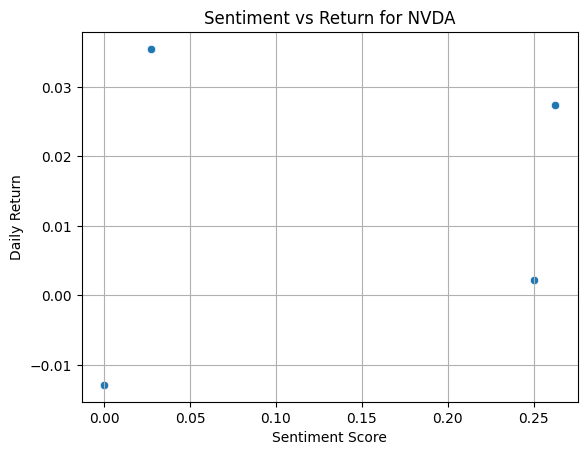

In [11]:

plot_sentiment_vs_return(merged_df, 'NVDA')
